In [1]:
import os
import io
import re
import requests
import zipfile
import shutil
from bs4 import BeautifulSoup as soup
import sys
import math
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from PIL import Image, ImageOps, ImageChops
import PIL
import requests
from datetime import datetime, timedelta
import pandas as pd
import glob

In [2]:
# prompt: mount the drive on DataScienceEngineer folder from Drive
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Get the DataScienceEngineer folder path
data_science_engineer_folder_path = '/content/drive/My Drive/DataScienceEngineer'

# Change the current working directory to the DataScienceEngineer folder
os.chdir(data_science_engineer_folder_path)

Mounted at /content/drive


In [3]:
!ls

 13_07_2022				'Data Science Engineer.ipynb'
 26_05_2022				'Data Science Engineer - Modelling.ipynb'
'Copie de Data Science Engineer.ipynb'	'Data Web Scraping.ipynb'
 data-array				 inceptionV3.ipynb


# Collecting data from source and storing in Azure Cloud

Pour une question de sécurité et de gestion de grand volume de données (dans notre cas ~43 GB), nous allons charger ces données sur Azure à travers Azure Storage Account.

In [4]:
def has_date(string):
    date_pattern = r'\b\d{2}-\d{2}-\d{4}\b'
    match = re.search(date_pattern, string)

    if match:
        return True
    else:
        return False


def read_and_format_data(period = "26_05_2022", new_size=(224, 224)):
  target_directory = "/content/drive/My Drive/DataScienceEngineer/"+period

  for folder in os.walk(target_directory):
      for file in folder[-1]:
          blob_path = ""
          file_path = os.path.join(folder[0], file)
          if file_path.split(".")[-1] in ["TIF", "tif", "JPG", "jpg"]:
            if 'Aerial_UAV_photos' in file_path:
              if 'NDVI' in file_path:
                blob_path = target_directory + "/structured-data/uav/ndvi/"
                blob_path += ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'
              if 'green' in file_path:
                blob_path = target_directory +"/structured-data/uav/green/"
                blob_path += ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'
              if 'nir' in file_path:
                blob_path = target_directory + "/structured-data/uav/nir/"
                blob_path += ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'
              if 'red' in file_path:
                blob_path = target_directory + "/structured-data/uav/red/"
                blob_path += ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'
              if 'rededge' in file_path:
                blob_path = target_directory + "/structured-data/uav/rededge/"
                blob_path += ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'

            if 'Ground_Multispectral_Photos' in file_path:
              if 'Armillaria_Stage_1' in file_path:
                if 'GRE' in file_path:
                  blob_path = target_directory + "/structured-data/multispectral/green/armillaria-stage-1/"
                  blob_path += file_path.split("/")[-2].lower() + "*" + ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'
                if 'NIR' in file_path:
                  blob_path = target_directory + "/structured-data/multispectral/nir/armillaria-stage-1/"
                  blob_path += file_path.split("/")[-2].lower() + "*" + ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'
                if 'RED' in file_path:
                  blob_path = target_directory + "/structured-data/multispectral/red/armillaria-stage-1/"
                  blob_path += file_path.split("/")[-2].lower() + "*" + ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'
                if 'REG' in file_path:
                  blob_path = target_directory + "/structured-data/multispectral/rededge/armillaria-stage-1/"
                  blob_path += file_path.split("/")[-2].lower() + "*" + ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'
                if 'RGB' in file_path:
                  blob_path = target_directory + "/structured-data/multispectral/rgb/armillaria-stage-1/"
                  blob_path += file_path.split("/")[-2].lower() + "*" + ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'

              if 'Armillaria_Stage_2' in file_path:
                if 'GRE' in file_path:
                  blob_path = target_directory + "/structured-data/multispectral/green/armillaria-stage-2/"
                  blob_path += file_path.split("/")[-2].lower() + '*' + ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'
                if 'NIR' in file_path:
                  blob_path = target_directory + "/structured-data/multispectral/nir/armillaria-stage-2/"
                  blob_path += file_path.split("/")[-2].lower() + "*" + ".".join(file.split("/")[-1].split('.')[:-1]) + '.png'
                if 'RED' in file_path:
                  blob_path = target_directory + "/structured-data/multispectral/red/armillaria-stage-2/"
                  blob_path += file_path.split("/")[-2].lower() + "*" + ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'
                if 'REG' in file_path:
                  blob_path = target_directory + "/structured-data/multispectral/rededge/armillaria-stage-2/"
                  blob_path += file_path.split("/")[-2].lower() + "*" + ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'
                if 'RGB' in file_path:
                  blob_path = target_directory + "/structured-data/multispectral/rgb/armillaria-stage-2/"
                  blob_path += file_path.split("/")[-2].lower() + "*" + ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'
              if 'Armillaria_Stage_3' in file_path:
                if 'GRE' in file_path:
                  blob_path = target_directory + "/structured-data/multispectral/green/armillaria-stage-3/"
                  blob_path += file_path.split("/")[-2].lower() + "*" + ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'
                if 'NIR' in file_path:
                  blob_path = target_directory + "/structured-data/multispectral/nir/armillaria-stage-3/"
                  blob_path += file_path.split("/")[-2].lower() + "*" + ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'
                if 'RED' in file_path:
                  blob_path = target_directory + "/structured-data/multispectral/red/armillaria-stage-3/"
                  blob_path += file_path.split("/")[-2].lower() + "*" + ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'
                if 'REG' in file_path:
                  blob_path = target_directory + "/structured-data/multispectral/rededge/armillaria-stage-3/"
                  blob_path += file_path.split("/")[-2].lower() + "*" + ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'
                if 'RGB' in file_path:
                  blob_path = target_directory +  "/structured-data/multispectral/rgb/armillaria-stage-3/"
                  blob_path += file_path.split("/")[-2].lower() + "*" + ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'
              if 'Healthy' in file_path:
                if 'GRE' in file_path:
                  blob_path = target_directory + "/structured-data/multispectral/green/healthy/"
                  blob_path += file_path.split("/")[-2].lower() + "*" + ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'
                if 'NIR' in file_path:
                  blob_path = target_directory + "/structured-data/multispectral/nir/healthy/"
                  blob_path += file_path.split("/")[-2].lower() + "*" + ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'
                if 'RED' in file_path:
                  blob_path = target_directory + "/structured-data/multispectral/red/healthy/"
                  blob_path += file_path.split("/")[-2].lower() + "*" + ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'
                if 'REG' in file_path:
                  blob_path = target_directory + "/structured-data/multispectral/rededge/healthy/"
                  blob_path += file_path.split("/")[-2].lower() + "*" + ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'
                if 'RGB' in file_path:
                  blob_path = target_directory + "/structured-data/multispectral/rgb/healthy/"
                  blob_path += file_path.split("/")[-2].lower() + "*" + ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'

            if 'Ground_RGB_Photos' in file_path:
              if 'Armillaria_Stage_1' in file_path:
                blob_path = target_directory + "/structured-data/rgb/armillaria-stage-1/"
                blob_path += ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'
              if 'Armillaria_Stage_2' in file_path:
                blob_path = target_directory + "/structured-data/rgb/armillaria-stage-2/"
                blob_path += ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'
              if 'Armillaria_Stage_3' in file_path:
                blob_path = target_directory + "/structured-data/rgb/armillaria-stage-3/"
                blob_path += ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'
              if 'Healthy' in file_path:
                blob_path = target_directory + "/structured-data/rgb/healthy/"
                blob_path += ".".join(file_path.split("/")[-1].split('.')[:-1]) + '.png'

          if len(blob_path) > 0 and Path(blob_path).exists() == False:
              # Loading an image
              img = Image.open(file_path)
              img = np.asarray(img)

              # Resizing image
              resized_img = cv.resize(img, new_size)
              resized_img = resized_img.astype(np.uint8)
              data = Image.fromarray(resized_img)

              # Saving the final output as a PNG file
              data.save(blob_path)
              print('File "{0}" saved...'.format(blob_path))

              # Removing original final to save/optimize memory
              # If you have enough memory, you can comment the below line
              os.remove(file_path)
          else:
              print('File "{0}" cant be saved...'.format(blob_path))

In [12]:
# For Training : 26_05_2022
read_and_format_data(period = "26_05_2022", new_size=(224, 224))

In [30]:
# For Testing : 13_07_2022
read_and_format_data(period = "13_07_2022", new_size=(224, 224))

File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...
File "" cant be saved...


In [10]:
def add_columns_label_data(period="26_05_2022"):
    label_path = "/content/drive/My Drive/DataScienceEngineer/" + period + "/" + period + ".csv"
    blob_path = "/content/drive/My Drive/DataScienceEngineer/"+ period +"/label_data.csv"

    columns = ['image','label']
    if Path(label_path).exists() == True:
      df = pd.read_csv(label_path, header=None, names=columns)
      # Saving the new version
      df.to_csv(blob_path, index=False)
      # Removing the old version
      os.remove(label_path)


In [18]:
add_columns_label_data(period="26_05_2022")

In [11]:
add_columns_label_data(period="13_07_2022")

In [7]:
label_data = pd.read_csv("/content/drive/My Drive/DataScienceEngineer/26_05_2022/label_data.csv")
label_data.head()

image  label
0   1-1      0
1   1-2      0
2   1-3      0
3   1-4      0
4   1-5      0

# Exploratory Data Analysis

In [8]:
label_data = pd.read_csv("/content/drive/My Drive/DataScienceEngineer/26_05_2022/label_data.csv")

In [9]:
dict_label = {0: "Healthy", 1: "Stage1", 2: "Stage2", 3: "Stage3"}
label_data["level"] = label_data["label"].map(dict_label)
label_data.head()

image  label    level
0   1-1      0  Healthy
1   1-2      0  Healthy
2   1-3      0  Healthy
3   1-4      0  Healthy
4   1-5      0  Healthy

## Global Distribution

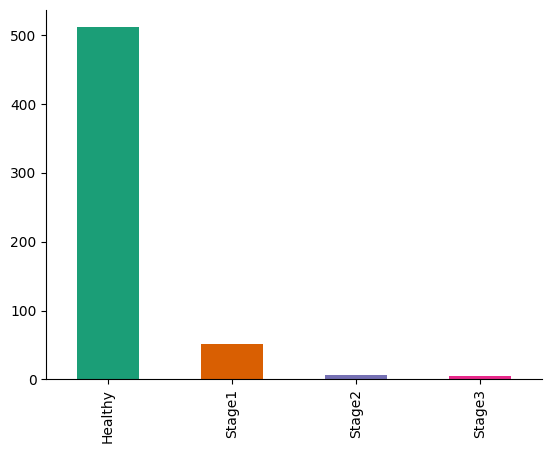

In [ ]:
label_data["level"].value_counts().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
label_data["level"].value_counts(normalize=True) * 100

Healthy    89.024390
Stage1      8.885017
Stage2      1.219512
Stage3      0.871080
Name: level, dtype: float64

Comme vous pouvez le remarquer qu'il y a un désequilbre en terme de nombre d'images dans les classes. En cette date, 89% des arbres sont en bonne santé. D'autre part 8.9% des arbres sont en stage 1, 1.2% en stage 2 et le reste en stage 3 d'Armillaria. Entrainer un modèle de machine learning sur ce type de données (désequilibre) entrainera des mauvaises performances car le modèle aura tendance à apprendre seulement sur la classe majoritaire. On appelle ce phénomene Overfitting.

Overfitting occurs when a model becomes too closely fit to the training data, making it unable to generalize well to new, unseen data. Data augmentation helps to mitigate this risk by creating new, synthetic training data that is similar to the existing data, but with variations that provide a more robust representation of the underlying patterns in the data. To address the imbalance in the dataset, we employed oversampling
techniques to equalize the dominant class. This was achieved by using various modifications to the images, such as clockwise rotations, vertical and horizontal flips, brightness adjustments (both reducing and increasing), and zooming in. These techniques were used to create new,
synthetic data that augmented the original dataset and helped to balance the distribution of images across the different classes.

Problème: Complexité en termes de génération de nouvelles données.
La question à se poser est: "Combien de transformations mathématiques faudrait-il aplliquer pour avoir un équilibre de classes?" Surtout que le stage 3 d'Armillaria n'est pas répandu. Il faudrait au moins 511/5 (~100) transformations pour avoir un équilibre entre Healthy et Stage3, environ 10 transformations pour Stage1. On voit bien la complexité du problème en voulant appliquer directement les transformations sur cet ensemble de données. Une solution serait d'utiliser les données de dates précédentes (26:05/2022 par exemple) mais uniquement des anomalies (les stages Armillaria) De plus, ces données sont des VRAIES données. Ci-après les distributions de ces données pour les dates anterieure:

## Modality Distribution

In [22]:
def plot_img(images_list, labels_list, figsize = (10, 6)):
  target_folder = "/content/drive/My Drive/DataScienceEngineer/26_05_2022/"
  if len(images_list) == 1:

    img = Image.open(target_folder + images_list[0])
    img = np.asarray(img)
    plt.imshow(img)
    plt.title(labels_list[0])
    plt.show()

  else:
    fig, axes = plt.subplots(1, len(images_list), sharey=True, figsize = figsize)

    for i, img_path in enumerate(images_list):
      img = Image.open(target_folder + img_path)
      img = np.asarray(img)
      axes[i].set_title(labels[i])
      axes[i].imshow(img)

    fig.tight_layout()
    plt.show()

In [21]:
def get_modality_data(modality, label_data, period="26_05_2022"):

    if modality == "multispectral":
      df = pd.DataFrame({},columns=["tree", "modality", "submodality", "level", "url"])
    if modality == "rgb":
      df = pd.DataFrame({},columns=["tree", "modality", "level", "url"])
    else:
      df = pd.DataFrame({},columns=["modality", "submodality", "url"])

    target_directory = "/content/drive/My Drive/DataScienceEngineer/"+ period +"/structured-data/" + modality

    if modality == "multispectral":
      for submodality in ['rgb', 'rededge', 'red', 'nir', 'green']:
        for level in ['armillaria-stage-1', 'healthy', 'armillaria-stage-3', 'armillaria-stage-2']:
          target_d =  os.path.join(target_directory, submodality, level)
          data_blobs = os.walk(target_d)
          for blob in data_blobs:
            for file in blob[-1]:
              file_path = os.path.join(blob[0], file)
              struct = file_path.split("/")
              # /content/drive/My Drive/DataScienceEngineer/26_05_2022/structured-data/multispectral/nir/armillaria-stage-1/2-16*IMG_700101_001417_0000_NIR.png

              tree_ = struct[-1].split(".")[0].split("*")[0]
              if tree_ in label_data["image"].unique():
                  level = label_data.loc[label_data["image"] == tree_, "level"].values[0]
                  row_df = pd.DataFrame([[tree_, struct[7], struct[8], level, file_path]], columns=["tree", "modality", "submodality", "level", "url"])
                  df = pd.concat([df, row_df], ignore_index=True)

    if modality == "rgb":
      for level in ['armillaria-stage-1', 'healthy', 'armillaria-stage-3', 'armillaria-stage-2']:
        target_d =  os.path.join(target_directory, level)
        data_blobs = os.walk(target_d)
        for blob in data_blobs:
            for file in blob[-1]:
              file_path = os.path.join(blob[0], file)
              struct = file_path.split("/")
              # /content/drive/My Drive/DataScienceEngineer/26_05_2022/structured-data/rgb/armillaria-stage-2/5-40.png

              tree_ = struct[-1].split(".")[0]
              if tree_ in label_data["image"].unique():
                level = label_data.loc[label_data["image"] == tree_, "level"].values[0]
                row_df = pd.DataFrame([[tree_, struct[7], level, file_path]], columns=["tree", "modality", "level", "url"])
                df = pd.concat([df, row_df], ignore_index=True)

    if modality == "uav":
      data_blobs = os.walk(target_directory)
      for blob in data_blobs:
        for file in blob[-1]:
          if ".data." in file:
            file_path = os.path.join(blob[0], file)
            struct = file_path.split("/")
            row_df = pd.DataFrame([[struct[7], struct[8], file_path]], columns=["modality", "submodality", "url"])
            df = pd.concat([df, row_df], ignore_index=True)

    return df

In [26]:
multispectral_df = get_modality_data(modality='multispectral', label_data=label_data)
rgb_df = get_modality_data(modality='rgb', label_data=label_data)
uav_df = get_modality_data(modality='uav', label_data=label_data)

In [13]:
multispectral_df.head()

modality submodality  \
0  multispectral         rgb   
1  multispectral         rgb   
2  multispectral         rgb   
3  multispectral         rgb   
4  multispectral         rgb   

                                                 url  tree   level  
0  /content/drive/My Drive/DataScienceEngineer/26...   9-4  Stage1  
1  /content/drive/My Drive/DataScienceEngineer/26...  9-38  Stage1  
2  /content/drive/My Drive/DataScienceEngineer/26...  8-40  Stage1  
3  /content/drive/My Drive/DataScienceEngineer/26...   8-5  Stage1  
4  /content/drive/My Drive/DataScienceEngineer/26...  8-57  Stage1

In [14]:
rgb_df.head()

tree modality   level                                                url
0  10-1      rgb  Stage1  /content/drive/My Drive/DataScienceEngineer/26...
1  10-3      rgb  Stage1  /content/drive/My Drive/DataScienceEngineer/26...
2  2-17      rgb  Stage1  /content/drive/My Drive/DataScienceEngineer/26...
3  2-25      rgb  Stage1  /content/drive/My Drive/DataScienceEngineer/26...
4  3-26      rgb  Stage1  /content/drive/My Drive/DataScienceEngineer/26...

In [15]:
uav_df.head()

modality submodality                                                url
0      uav        ndvi  /content/drive/My Drive/DataScienceEngineer/26...
1      uav       green  /content/drive/My Drive/DataScienceEngineer/26...
2      uav         nir  /content/drive/My Drive/DataScienceEngineer/26...
3      uav         red  /content/drive/My Drive/DataScienceEngineer/26...
4      uav     rededge  /content/drive/My Drive/DataScienceEngineer/26...

Let's now join these dataframes. The RGB and Multispectral data will be join on date and tree, the resulting dataframe will be joined with UAV on date onl.

In [16]:
final_df = rgb_df.merge(multispectral_df.drop('level', axis=1), how="inner", on="tree", suffixes=["_rgb", "_multispectral"])
final_df.head()

tree modality_rgb   level  \
0  10-1          rgb  Stage1   
1  10-1          rgb  Stage1   
2  10-1          rgb  Stage1   
3  10-1          rgb  Stage1   
4  10-1          rgb  Stage1   

                                             url_rgb modality_multispectral  \
0  /content/drive/My Drive/DataScienceEngineer/26...          multispectral   
1  /content/drive/My Drive/DataScienceEngineer/26...          multispectral   
2  /content/drive/My Drive/DataScienceEngineer/26...          multispectral   
3  /content/drive/My Drive/DataScienceEngineer/26...          multispectral   
4  /content/drive/My Drive/DataScienceEngineer/26...          multispectral   

  submodality                                  url_multispectral  
0         rgb  /content/drive/My Drive/DataScienceEngineer/26...  
1     rededge  /content/drive/My Drive/DataScienceEngineer/26...  
2         red  /content/drive/My Drive/DataScienceEngineer/26...  
3         nir  /content/drive/My Drive/DataScienceEngineer/26...  
4       green  /content/drive/My Drive/DataScienceEngineer/26...

In [8]:
final_df.to_csv("/content/drive/My Drive/DataScienceEngineer/26_05_2022/final_label.csv", index=False)

### Ground RGB Images

In [8]:
final_df = pd.read_csv("/content/drive/My Drive/DataScienceEngineer/26_05_2022/final_label.csv")
final_df.head()

tree modality_rgb   level  \
0  10-1          rgb  Stage1   
1  10-1          rgb  Stage1   
2  10-1          rgb  Stage1   
3  10-1          rgb  Stage1   
4  10-1          rgb  Stage1   

                                             url_rgb modality_multispectral  \
0  /content/drive/My Drive/DataScienceEngineer/26...          multispectral   
1  /content/drive/My Drive/DataScienceEngineer/26...          multispectral   
2  /content/drive/My Drive/DataScienceEngineer/26...          multispectral   
3  /content/drive/My Drive/DataScienceEngineer/26...          multispectral   
4  /content/drive/My Drive/DataScienceEngineer/26...          multispectral   

  submodality                                  url_multispectral  
0         rgb  /content/drive/My Drive/DataScienceEngineer/26...  
1     rededge  /content/drive/My Drive/DataScienceEngineer/26...  
2         red  /content/drive/My Drive/DataScienceEngineer/26...  
3         nir  /content/drive/My Drive/DataScienceEngineer/26...  
4       green  /content/drive/My Drive/DataScienceEngineer/26...

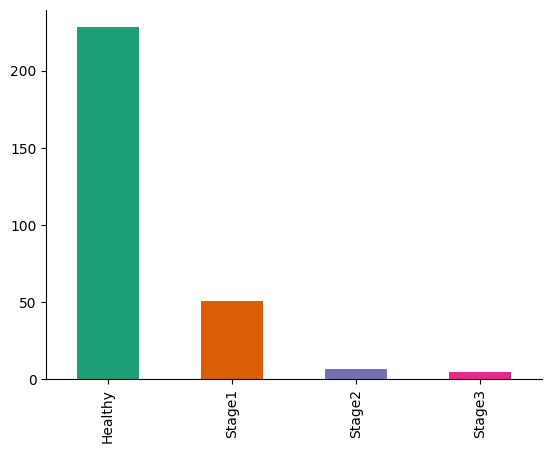

In [18]:
final_df[["tree", "level"]].drop_duplicates()["level"].value_counts().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [19]:
final_df[["tree", "level"]].drop_duplicates()["level"].value_counts()

Healthy    228
Stage1      51
Stage2       7
Stage3       5
Name: level, dtype: int64

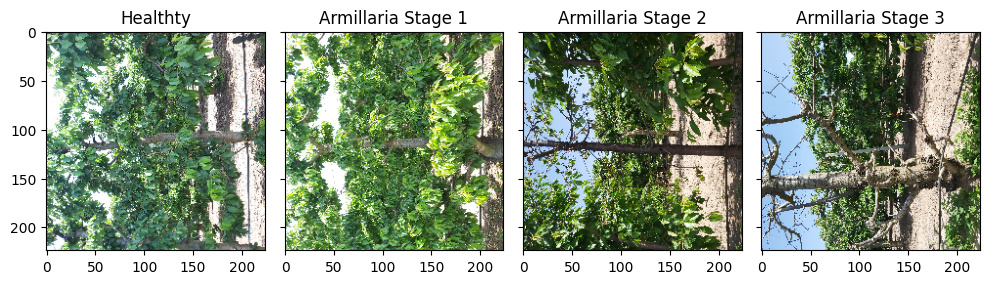

In [46]:
rgb_img_samples = [
    "structured-data/rgb/healthy/1-6.png",
    "structured-data/rgb/armillaria-stage-1/2-17.png",
    "structured-data/rgb/armillaria-stage-2/6-58.png",
    "structured-data/rgb/armillaria-stage-3/6-63.png"
    ]
labels = ["Healthty", "Armillaria Stage 1", "Armillaria Stage 2", "Armillaria Stage 3"]
plot_img(rgb_img_samples, labels)

On remarque plus l'arbre est à stade avancé de l'Armillaria, plus il perd les feuilles. Ce qui est contraire pour l'abre sain ou au stage 1. Une des hypothèse est donc  les feuilles sur l'arbre jouent un role important dans la determination de l'Armillaria ou non.

### Ground Multispectral Images

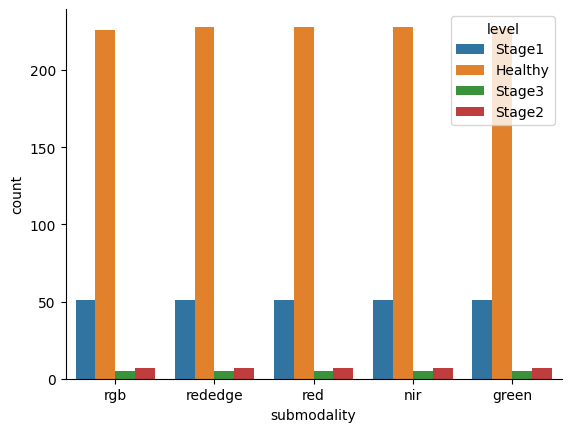

In [48]:
sns.countplot(data=final_df[["tree", "submodality", "level"]].drop_duplicates(), x='submodality', hue='level')
plt.gca().spines[['top', 'right',]].set_visible(False)

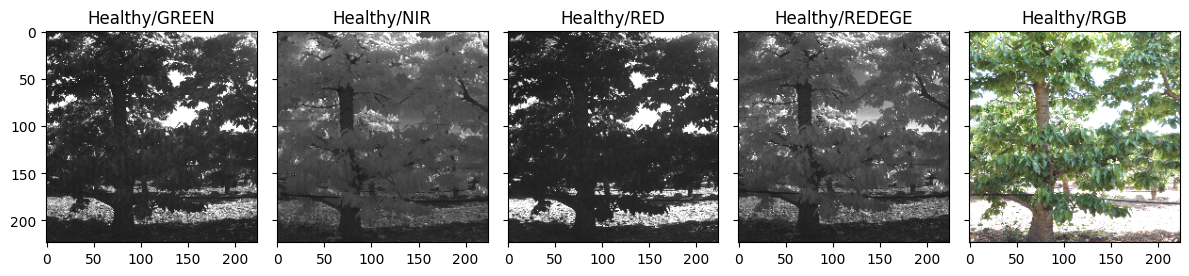

In [53]:
healthy_img_samples = [
    "structured-data/multispectral/green/healthy/5-5*IMG_700101_005252_0000_GRE.png",
    "structured-data/multispectral/nir/healthy/5-5*IMG_700101_005252_0000_NIR.png",
    "structured-data/multispectral/red/healthy/5-5*IMG_700101_005252_0000_RED.png",
    "structured-data/multispectral/rededge/healthy/5-5*IMG_700101_005252_0000_REG.png",
    "structured-data/multispectral/rgb/healthy/5-5*IMG_700101_005252_0000_RGB.png"
    ]
labels = ["Healthy/GREEN", "Healthy/NIR", "Healthy/RED", "Healthy/REDEGE", "Healthy/RGB"]
plot_img(healthy_img_samples, labels, figsize = (12, 6))

Note: Vu les contraintes de temps, nous ne pouvons pas traiter l'ensemble des sous-modalités de multispectral. Puisque nous avons déjà, une modalité en RGB alors nous nous concentrerons sur la sous-modalité NIR dans la phase de modélisation (architectures de deep learning). Rappelons que ce choix est arbitraire, l'on pouvait prendre REDEGE tout comme GREEN.

### UAV Images

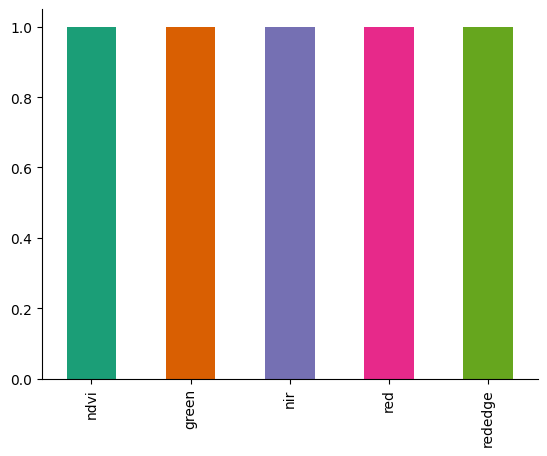

In [55]:
uav_df["submodality"].value_counts().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

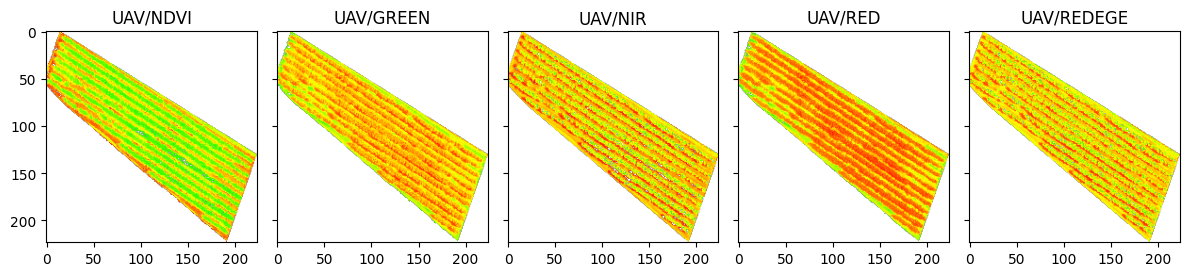

In [54]:
uav_img_samples = [
    "structured-data/uav/ndvi/NDVI.rgb.png",
    "structured-data/uav/green/green.rgb.png",
    "structured-data/uav/nir/nir.rgb.png",
    "structured-data/uav/red/red.rgb.png",
    "structured-data/uav/rededge/rededge.rgb.png",
    ]
labels = ["UAV/NDVI", "UAV/GREEN", "UAV/NIR", "UAV/RED", "UAV/REDEGE"]
plot_img(uav_img_samples, labels, figsize = (12, 6))

Remarque: Comme précédemment (contraintes de temps nécessaire pour analyser tous les cas possibles), nous utiliserons les images en NDVI afin de modéliser les données.

Nous remarquons une legère augmentation de données mais elles ne sont pas suffisant pour se lancer dans la phase d'entrainement d'un modèle. Pour ce faire, nous pouvons maintenant appliquer les transformations afin d'augmenter les données.

Deep learning architectures which we will use require a fixed/recommended image size (for example 299x299), we resized all images to the required size.

Avant tout créons une fonction qui permet de collecter les données par date, classe et modalité depuis le cloud Azure où nos données sont stockées.

# Preprocessing techniques

### Histogram equalization

First, we enhanced image contrast by using histogram equalization to highlight possible features. Histogram equalization is a technique used to adjust pixel distribution and allocate image intensities. Figure 1 shows the image and histogram before and after histogram equalization, which demonstrates that the contrast of the new image has been enhanced and its histogram has also been equalized.



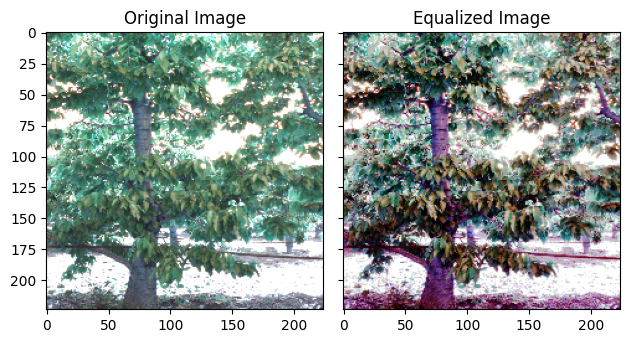

In [20]:
image = cv.imread('/content/drive/My Drive/DataScienceEngineer/26_05_2022/structured-data/multispectral/rgb/healthy/5-5*IMG_700101_005252_0000_RGB.png',
                  cv.COLOR_BGR2RGB)
img = np.array(image)

# Split channels
b, g, r = cv.split(image)

# Apply histogram equalization to each channel
b_equalized = cv.equalizeHist(b)
g_equalized = cv.equalizeHist(g)
r_equalized = cv.equalizeHist(r)

# Merge the equalized channels
equalized_image = cv.merge([b_equalized, g_equalized, r_equalized])
equalized_img = np.asarray(equalized_image)

# Display the original and equalized images
fig, axes = plt.subplots(1, 2, sharey=True)

axes[0].set_title("Original Image")
axes[0].imshow(img)
axes[1].set_title("Equalized Image")
axes[1].imshow(equalized_img)

fig.tight_layout()
plt.show()

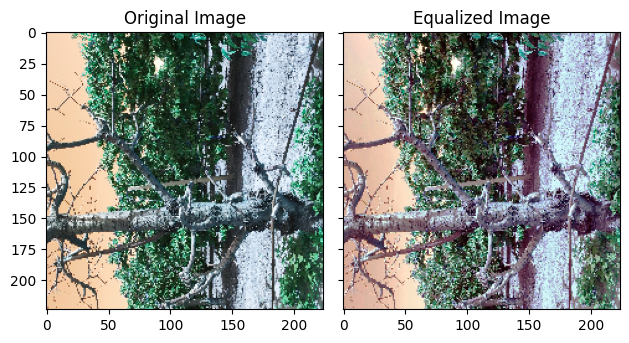

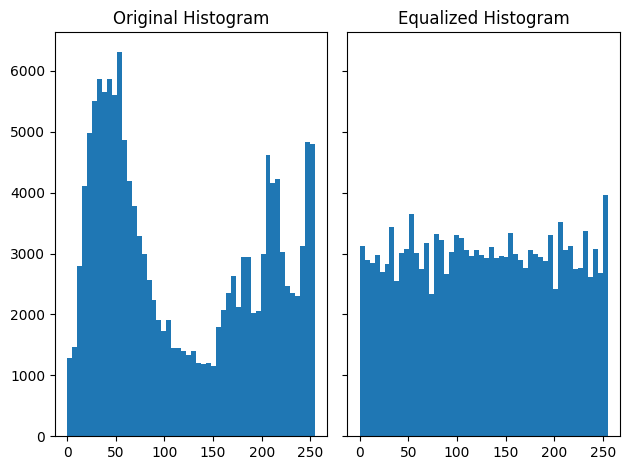

In [21]:
image = cv.imread('/content/drive/My Drive/DataScienceEngineer/26_05_2022/structured-data/rgb/armillaria-stage-3/6-63.png',
                  cv.COLOR_BGR2RGB)
img = np.array(image)

# Split channels
b, g, r = cv.split(image)

# Apply histogram equalization to each channel
b_equalized = cv.equalizeHist(b)
g_equalized = cv.equalizeHist(g)
r_equalized = cv.equalizeHist(r)

# Merge the equalized channels
equalized_image = cv.merge([b_equalized, g_equalized, r_equalized])
equalized_img = np.asarray(equalized_image)

# Display the original and equalized images
fig, axes = plt.subplots(1, 2, sharey=True)
axes[0].set_title("Original Image")
axes[0].imshow(img)
axes[1].set_title("Equalized Image")
axes[1].imshow(equalized_img)
fig.tight_layout()
plt.show()

print("\n")
fig, axes = plt.subplots(1, 2, sharey=True)
axes[0].set_title("Original Histogram")
axes[0].hist(img.flatten(), bins=50)
axes[1].set_title("Equalized Histogram")
axes[1].hist(equalized_img.flatten(), bins=50)
fig.tight_layout()
plt.show()

In [10]:
def histogram_equalization(image):

  # Split channels
  r, g, b = image[:,:,0], image[:,:,1], image[:,:,2]

  # Apply histogram equalization to each channel
  r_equalized = cv.equalizeHist(r.astype(np.uint8))
  g_equalized = cv.equalizeHist(g.astype(np.uint8))
  b_equalized = cv.equalizeHist(b.astype(np.uint8))

  # Merge the equalized channels
  equalized_img = np.stack((r_equalized, g_equalized, b_equalized), axis=-1)
  return np.asarray(equalized_img)

In [11]:
def get_data_by(path_images, new_size = (224, 224)):
    images_to_return = []

    for blob in path_images:
        img = Image.open(blob)
        img = np.asarray(img)
        #resized_img = cv.resize(img, new_size,)
        images_to_return += [histogram_equalization(img)]
    return np.array(images_to_return)

In [99]:
rgb_data = final_df[["tree", "level", "url_rgb"]].drop_duplicates()
stage2_df = rgb_data[rgb_data["level"] == "Stage2"]

In [100]:
stage_2_rgb = get_data_by(stage2_df.url_rgb.unique())

Ci-après une visualisation de certaines images d'arbres au stage 2 d'Armillaria reshapées.

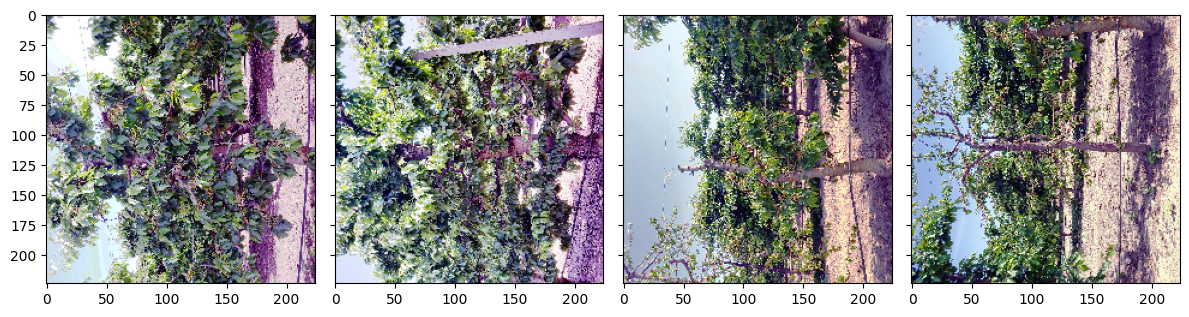

In [101]:
fig, axes = plt.subplots(1, 4, sharey=True, figsize = (12, 6))
for i in range(4):
  axes[i].imshow(stage_2_rgb[i])

fig.tight_layout()
plt.show()

In [102]:
rgb_data["level"].value_counts()

Healthy    228
Stage1      51
Stage2       7
Stage3       5
Name: level, dtype: int64

Maintenant cherchons à équilibrer les classes. Pour ce faire, il déterminer le nombre d'images à générer pour chaque image. Par exemple, pour le cas de la modalité RGB et de la classe Stage 1, ayant une image il nous faut générer (508 - 51)/51 ~ 9 images.

In [39]:
(228-7)/(7)

31.571428571428573

In [12]:
import tensorflow as tf
from tensorflow.keras import layers

def data_augmentation(images_to_augment, num_to_generate_per_images=10):

  # Data augmentation transformations
  data_augmentation = tf.keras.Sequential([
      layers.RandomRotation(factor=0.3),
      layers.RandomContrast(factor=0.3),
      layers.RandomBrightness(factor=0.3),
      layers.RandomFlip(mode='horizontal_and_vertical'),
      layers.RandomCrop(height=224, width=224, seed=42),
  ])

  # Data augmentation to generate new images
  generated_images = []
  for image_to_augment in images_to_augment:
    for _ in range(num_to_generate_per_images):
        augmented_image = data_augmentation(tf.expand_dims(image_to_augment, axis=0), training=True)
        generated_images.append(histogram_equalization(np.array(augmented_image[0])))
  return np.array(generated_images)

In [111]:
generated_stage_2_rgb = data_augmentation(stage_2_rgb, num_to_generate_per_images=10)

In [112]:
generated_stage_2_rgb.shape

(70, 224, 224, 3)

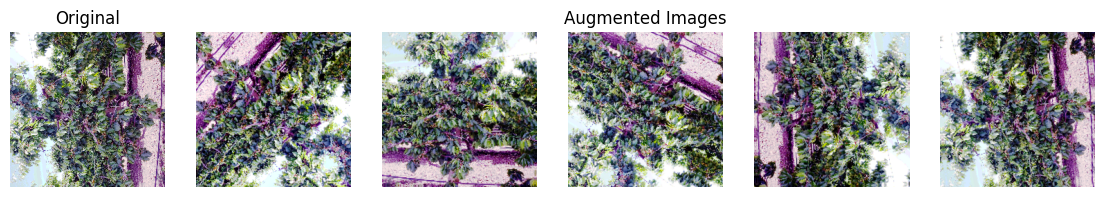

In [113]:
# Visualize the generated images
plt.figure(figsize=(14, 10))
plt.subplot(1, 6, 1)
plt.imshow(stage_2_rgb[0].astype("uint8"))
plt.title("Original")
plt.axis("off")
for i, image in enumerate(generated_stage_2_rgb[:5]):
    plt.subplot(1, 6, i + 2)
    plt.imshow(image.astype("uint8"))
    if i == 2:
      plt.title("Augmented Images")
    plt.axis("off")
plt.show()

Concatenons maintenant les données originales avec les données générées.

In [114]:
final_rgb_stage2 = np.vstack((stage_2_rgb, generated_stage_2_rgb))
final_rgb_stage2.shape

(77, 224, 224, 3)

Refaisons le processus pour le reste de données/classes et modalités

In [115]:
rgb_data = final_df[["tree", "level", "url_rgb"]].drop_duplicates()

healthy_df = rgb_data[rgb_data["level"] == "Healthy"]
healthy_rgb = get_data_by(healthy_df.url_rgb.unique())

In [116]:
healthy_rgb.shape

(228, 224, 224, 3)

#### RGB

In [117]:
rgb_data = final_df[["tree", "level", "url_rgb"]].drop_duplicates()
max_img = rgb_data.level.value_counts()[rgb_data.level.value_counts().argmax()]

n0 = int(np.round((max_img - rgb_data.level.value_counts()["Healthy"]) / rgb_data.level.value_counts()["Healthy"]))
n1 = int(np.round((max_img - rgb_data.level.value_counts()["Stage1"]) / rgb_data.level.value_counts()["Stage1"]))
n2 = int(np.round((max_img - rgb_data.level.value_counts()["Stage2"]) / rgb_data.level.value_counts()["Stage2"]))
n3 = int(np.round((max_img - rgb_data.level.value_counts()["Stage3"]) / rgb_data.level.value_counts()["Stage3"]))

stage1_df = rgb_data[rgb_data["level"] == "Stage1"]
stage_1_rgb = get_data_by(stage1_df.url_rgb.unique())
final_rgb_stage1 = stage_1_rgb.copy()
if n1 > 0:
  generated_stage_1_rgb = data_augmentation(stage_1_rgb, num_to_generate_per_images=n1)
  final_rgb_stage1 = np.vstack((stage_1_rgb, generated_stage_1_rgb))

stage2_df = rgb_data[rgb_data["level"] == "Stage2"]
stage_2_rgb = get_data_by(stage2_df.url_rgb.unique())
final_rgb_stage2 = stage_2_rgb.copy()
if n2 > 0:
  generated_stage_2_rgb = data_augmentation(stage_2_rgb, num_to_generate_per_images=n2)
  final_rgb_stage2 = np.vstack((stage_2_rgb, generated_stage_2_rgb))

stage3_df = rgb_data[rgb_data["level"] == "Stage3"]
stage_3_rgb = get_data_by(stage3_df.url_rgb.unique())
final_rgb_stage3 = stage_3_rgb.copy()
if n3 > 0:
  generated_stage_3_rgb = data_augmentation(stage_3_rgb, num_to_generate_per_images=n3)
  final_rgb_stage3 = np.vstack((stage_3_rgb, generated_stage_3_rgb))


healthy_df = rgb_data[rgb_data["level"] == "Healthy"]
healthy_rgb = get_data_by(healthy_df.url_rgb.unique())
final_rgb_healthy = healthy_rgb.copy()
if n0 > 0:
  generated_healthy_rgb = data_augmentation(healthy_rgb, num_to_generate_per_images=n0)
  final_rgb_healthy = np.vstack((healthy_rgb, generated_healthy_rgb))

final_data_rgb = np.vstack((final_rgb_healthy, final_rgb_stage1, final_rgb_stage2, final_rgb_stage3))
final_label_rgb = np.hstack((np.array([0] * len(final_rgb_healthy)), np.array([1] * len(final_rgb_stage1)),
          np.array([2] * len(final_rgb_stage2)), np.array([3] * len(final_rgb_stage3))))

indexes = np.arange(len(final_data_rgb))
np.random.shuffle(indexes)
final_data_rgb = final_data_rgb[indexes]
final_label_rgb = final_label_rgb[indexes]

np.save("data-array/final_data_rgb.npy", final_data_rgb)
np.save("data-array/final_label_rgb.npy", final_label_rgb)

#### Multispectral

In [120]:
for submod in ["nir", "green", "red", "rededge", "rgb"]:
    multi_data = final_df[final_df["submodality"] == submod][["tree", "level", "url_multispectral"]].drop_duplicates()
    max_img = multi_data.level.value_counts()[multi_data.level.value_counts().argmax()]

    n0 = int(np.round((max_img - multi_data.level.value_counts()["Healthy"]) / multi_data.level.value_counts()["Healthy"]))
    n1 = int(np.round((max_img - multi_data.level.value_counts()["Stage1"]) / multi_data.level.value_counts()["Stage1"]))
    n2 = int(np.round((max_img - multi_data.level.value_counts()["Stage2"]) / multi_data.level.value_counts()["Stage2"]))
    n3 = int(np.round((max_img - multi_data.level.value_counts()["Stage3"]) / multi_data.level.value_counts()["Stage3"]))

    stage1_df = multi_data[multi_data["level"] == "Stage1"]
    stage_1_multi = get_data_by(stage1_df.url_multispectral.unique())
    final_multi_stage1 = stage_1_multi.copy()
    if n1 > 0:
      generated_stage_1_multi = data_augmentation(stage_1_multi, num_to_generate_per_images=n1)
      final_multi_stage1 = np.vstack((stage_1_multi, generated_stage_1_multi))

    stage2_df = multi_data[multi_data["level"] == "Stage2"]
    stage_2_multi = get_data_by(stage2_df.url_multispectral.unique())
    final_multi_stage2 = stage_2_multi.copy()
    if n2 > 0:
      generated_stage_2_multi = data_augmentation(stage_2_multi, num_to_generate_per_images=n2)
      final_multi_stage2 = np.vstack((stage_2_multi, generated_stage_2_multi))

    stage3_df = multi_data[multi_data["level"] == "Stage3"]
    stage_3_multi = get_data_by(stage3_df.url_multispectral.unique())
    final_multi_stage3 = stage_3_multi.copy()
    if n3 > 0:
      generated_stage_3_multi = data_augmentation(stage_3_multi, num_to_generate_per_images=n3)
      final_multi_stage3 = np.vstack((stage_3_multi, generated_stage_3_multi))

    healthy_df = multi_data[multi_data["level"] == "Healthy"]
    healthy_multi = get_data_by(healthy_df.url_multispectral.unique())
    final_multi_healthy = healthy_multi.copy()
    if n0 > 0:
      generated_healthy_multi = data_augmentation(healthy_multi, num_to_generate_per_images=n0)
      final_multi_healthy = np.vstack((healthy_multi, generated_healthy_multi))

    final_data_multi = np.vstack((final_multi_healthy, final_multi_stage1, final_multi_stage2, final_multi_stage3))
    final_label_multi = np.hstack((np.array([0] * len(final_multi_healthy)), np.array([1] * len(final_multi_stage1)),
              np.array([2] * len(final_multi_stage2)), np.array([3] * len(final_multi_stage3))))

    indexes = np.arange(len(final_data_multi))
    np.random.shuffle(indexes)
    final_data_multi = final_data_multi[indexes]
    final_label_multi = final_label_multi[indexes]

    np.save("data-array/final_data_multi_" + submod +".npy", final_data_multi)
    np.save("data-array/final_label_multi_" + submod +".npy", final_label_multi)

# RGB + Multispectral

In [56]:
def get_multimodal_data_by(classe, rgb_file_path, multi_file_path, modalities, new_size = (224, 224)):

    rgb_images_to_return = []
    multi_images_to_return = []

    for blob_rgb, blob_multi in zip(list(rgb_file_path), list(multi_file_path)):
      n = 0
      for modality in modalities:
        if modality == "rgb":
          # structured-data/rgb/armillaria-stage-3/3*5-40.png
          if ("structured-data/" + modality in blob_rgb) and (classe in blob_rgb):
            n += 1
            img = Image.open(blob_rgb)
            rgb_img = np.asarray(img)
            rgb_resized_img = cv.resize(rgb_img, new_size)

        if modality == "multispectral":
          if ("structured-data/" + modality in blob_multi) and (classe in blob_multi) and ("rededge" in blob_multi):
            n += 1
            img = Image.open(blob_multi)
            multi_img = np.asarray(img)
            multi_resized_img = cv.resize(multi_img, new_size)

      if n == 2:
        rgb_images_to_return += [rgb_resized_img]
        multi_images_to_return += [multi_resized_img]

    return np.array(rgb_images_to_return), np.array(multi_images_to_return)

In [69]:
df_ = final_df[["tree", "level"]].drop_duplicates()
df_ = df_.merge(final_df[["tree", "url_rgb"]], how="inner", on="tree").drop_duplicates()
df_ = df_.merge(final_df[final_df.submodality=="rededge"][["tree", "url_multispectral"]], how="inner", on="tree").drop_duplicates()
df_.head()

tree   level                                            url_rgb  \
0  10-1  Stage1  /content/drive/My Drive/DataScienceEngineer/26...   
1  10-3  Stage1  /content/drive/My Drive/DataScienceEngineer/26...   
2  2-17  Stage1  /content/drive/My Drive/DataScienceEngineer/26...   
3  2-25  Stage1  /content/drive/My Drive/DataScienceEngineer/26...   
4  3-26  Stage1  /content/drive/My Drive/DataScienceEngineer/26...   

                                   url_multispectral  
0  /content/drive/My Drive/DataScienceEngineer/26...  
1  /content/drive/My Drive/DataScienceEngineer/26...  
2  /content/drive/My Drive/DataScienceEngineer/26...  
3  /content/drive/My Drive/DataScienceEngineer/26...  
4  /content/drive/My Drive/DataScienceEngineer/26...

In [89]:
df_.shape

(291, 4)

In [71]:
healthy_df = df_[df_["level"] == "Healthy"]
healthy_rgb, healthy_multi = get_multimodal_data_by('healthy', healthy_df.url_rgb.unique(),
                                                    healthy_df.url_multispectral.unique(), ['rgb', 'multispectral'])

In [72]:
healthy_rgb.shape

(228, 224, 224, 3)

In [94]:
stage1_df = df_[df_["level"] == "Stage1"]
stage1_rgb, stage1_multi = get_multimodal_data_by('armillaria-stage-1', stage1_df.url_rgb.unique(),
                                                    stage1_df.url_multispectral.unique(), ['rgb', 'multispectral'])

In [95]:
stage1_rgb.shape

(51, 224, 224, 3)

In [96]:
stage2_df = df_[df_["level"] == "Stage2"]
stage2_rgb, stage2_multi = get_multimodal_data_by('armillaria-stage-2', stage2_df.url_rgb.unique(),
                                                    stage2_df.url_multispectral.unique(), ['rgb', 'multispectral'])

In [97]:
stage2_rgb.shape

(7, 224, 224, 3)

In [98]:
stage3_df = df_[df_["level"] == "Stage3"]
stage3_rgb, stage3_multi = get_multimodal_data_by('armillaria-stage-3', stage3_df.url_rgb.unique(),
                                                    stage3_df.url_multispectral.unique(), ['rgb', 'multispectral'])

In [99]:
stage3_rgb.shape

(5, 224, 224, 3)

In [100]:
#generated_healthy_rgb = data_augmentation(healthy_rgb, num_to_generate_per_images=3)
#final_rgb_healthy = np.vstack((healthy_rgb, generated_healthy_rgb))
final_rgb_healthy = healthy_rgb.copy()

#generated_healthy_multi = data_augmentation(healthy_multi, num_to_generate_per_images=3)
#final_multi_healthy = np.vstack((healthy_multi, generated_healthy_multi))
final_multi_healthy = healthy_multi.copy()

n1 = int(np.round((len(final_rgb_healthy) - len(stage1_rgb)) / len(stage1_rgb)))
n2 = int(np.round((len(final_rgb_healthy) - len(stage2_rgb)) / len(stage2_rgb)))
n3 = int(np.round((len(final_rgb_healthy) - len(stage3_rgb)) / len(stage3_rgb)))

if n1 > 0:
  generated_stage_1_rgb = data_augmentation(stage1_rgb, num_to_generate_per_images=n1)
  final_rgb_stage1 = np.vstack((stage1_rgb, generated_stage_1_rgb))

  generated_stage_1_multi = data_augmentation(stage1_multi, num_to_generate_per_images=n1)
  final_multi_stage1 = np.vstack((stage1_multi, generated_stage_1_multi))

if n2 > 0:
  generated_stage_2_rgb = data_augmentation(stage2_rgb, num_to_generate_per_images=n2)
  final_rgb_stage2 = np.vstack((stage2_rgb, generated_stage_2_rgb))

  generated_stage_2_multi = data_augmentation(stage2_multi, num_to_generate_per_images=n2)
  final_multi_stage2 = np.vstack((stage2_multi, generated_stage_2_multi))

if n3 > 0:
  generated_stage_3_rgb = data_augmentation(stage3_rgb, num_to_generate_per_images=n3)
  final_rgb_stage3 = np.vstack((stage3_rgb, generated_stage_3_rgb))

  generated_stage_3_multi = data_augmentation(stage3_multi, num_to_generate_per_images=n3)
  final_multi_stage3 = np.vstack((stage3_multi, generated_stage_3_multi))

# Ground RGB
final_data_rgb = np.vstack((final_rgb_healthy, final_rgb_stage1, final_rgb_stage2, final_rgb_stage3))
final_label_rgb = np.hstack((np.array([0] * len(final_rgb_healthy)), np.array([1] * len(final_rgb_stage1)),
          np.array([2] * len(final_rgb_stage2)), np.array([3] * len(final_rgb_stage3))))

indexes = np.arange(len(final_data_rgb))
np.random.shuffle(indexes)
final_data_rgb = final_data_rgb[indexes]
final_label_rgb = final_label_rgb[indexes]

np.save("data-array/final_data_combined_rgb.npy", final_data_rgb)
np.save("data-array/final_label_combined_rgb.npy", final_label_rgb)

# Multispectral Rededge
final_data_multi = np.vstack((final_multi_healthy, final_multi_stage1, final_multi_stage2, final_multi_stage3))
final_label_multi = np.hstack((np.array([0] * len(final_multi_healthy)), np.array([1] * len(final_multi_stage1)),
          np.array([2] * len(final_multi_stage2)), np.array([3] * len(final_multi_stage3))))
indexes = np.arange(len(final_data_rgb))
np.random.shuffle(indexes)
final_data_rgb = final_data_rgb[indexes]
final_label_rgb = final_label_rgb[indexes]
np.save("data-array/final_data_combined_multi.npy", final_data_rgb)
np.save("data-array/final_label_combined_multi.npy", final_label_rgb)

In [101]:
final_data_multi.shape

(893, 224, 224, 3)

In [102]:
final_data_rgb.shape

(893, 224, 224, 3)